### 2. Poisson Distribution - what can it model:

#### 2.1. Spikes arriving at a neuron typically is a Poisson process. The firing of a neuron is often modeled also as a Poisson process. Download this in vivo spike data, show that the spiking of a neuron is a Poisson process (or probably not) by fitting a Poisson distribution to the number of spikes in a time window. Also show that the inter-spike intervals follow an exponential distribution (or not). Plot both the histogram of data samples and the fit distribution curve in the same figure. Include all codes you use to process the data in a notebook, keeping all results, and explain your findings in markdowns. Note the following:

#### Data description: The data is downloaded from a public dataset hc-3 which contains LFP recordings from hippocampal areas of rats. ThisLinks to an external site. website provides an overview of the dataset. The spike data you need is in the two folders "ec012" and "ec016" in the zip folder you downloaded, each recorded from a rat. In each folder, there are several data files with name format "xxxxx.yyy.res.zz", where xxxxx is the id of a rat, yyy is the session id and zz is a neuron id. There are two neurons in each session. The files can be opened or read in programs as text files. There is one single column in each file recording the spike times. Each value in the column is the time index of a spike in the recording. The sampling rate is 20kHz, so each time step is 0.05 ms. You are require to check all the 14 files provided. You don't need to show results for all but choose at least THREE, which you think can represent a variety of cases among them.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as signal
from scipy.stats import poisson, expon

##### First, setup the distribution/data

In [21]:
# Load spike times (single column text file)
file_path = 'BuszakiLab-MizusekiK-hc3/ec012/ec012ec.187.res.1'
spike_indices = np.loadtxt(file_path)

# Convert indices to time in seconds
sampling_rate = 20000  # 20 kHz
spike_times = spike_indices / sampling_rate

print("Total spikes:", len(spike_times))



Total spikes: 89148


## Data Processing

#### The spike data file contains spike time indices recorded at a sampling rate of 20 kHz.
#### Each time step corresponds to:

#### 0.05 ms = 1 / 20000 seconds

#### We convert spike indices to seconds by dividing by 20000.

Next, test if Spike Counts Follow a Poisson Distribution

In [22]:
# Define time window (e.g., 100 ms)
window_size = 0.1  # seconds

T = spike_times[-1]  # total recording time
num_windows = int(T / window_size)

# Count spikes per window
counts = []

for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    count = np.sum((spike_times >= start) & (spike_times < end))
    counts.append(count)

counts = np.array(counts)

# Estimate lambda (mean spikes per window)
lambda_hat = np.mean(counts)

print("Estimated λ (mean spikes per window):", lambda_hat)


Estimated λ (mean spikes per window): 8.13125969169023


Then, plot histogram to visualize data & compare

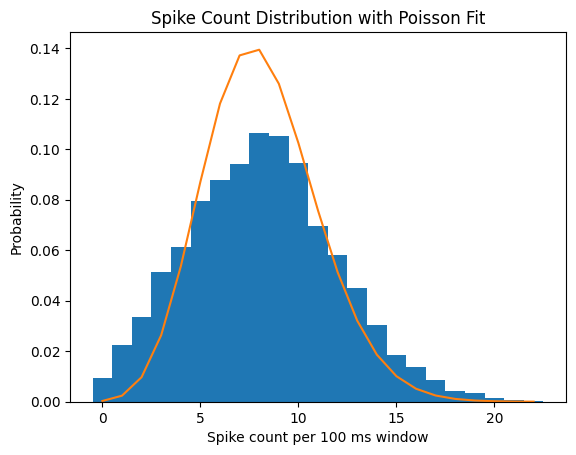

In [23]:
# Histogram of spike counts
plt.figure()
bins = np.arange(0, max(counts)+2) - 0.5
plt.hist(counts, bins=bins, density=True)

# Poisson PMF
x = np.arange(0, max(counts)+1)
plt.plot(x, poisson.pmf(x, lambda_hat))

plt.xlabel("Spike count per 100 ms window")
plt.ylabel("Probability")
plt.title("Spike Count Distribution with Poisson Fit")
plt.show()


## Poisson Fit for Spike Counts

If spike generation follows a Poisson process:

- The number of spikes in fixed time windows should follow a Poisson distribution.
- The Poisson parameter λ equals the mean spike count per window.
- mean = variance

We estimate λ using the sample mean and overlay the Poisson PMF over the histogram.

If the histogram closely matches the Poisson curve, the spike counts are consistent with a Poisson process.

I would say this looks fairly accurate, and it is slightly skewed-right as well.

In [24]:
# Compute inter-spike intervals
isi = np.diff(spike_times)

# Estimate rate parameter
rate_hat = 1 / np.mean(isi)

print("Estimated rate (Hz):", rate_hat)


Estimated rate (Hz): 81.30958162372626


## Plot Exponential fit & Histogram

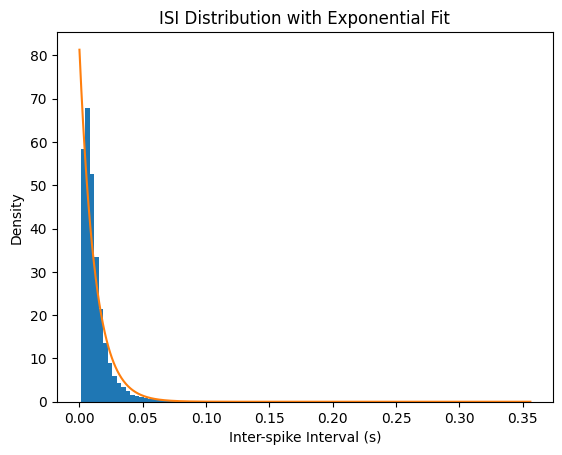

In [25]:
plt.figure()

# Histogram
plt.hist(isi, bins=100, density=True)

# Exponential PDF
x = np.linspace(0, max(isi), 1000)
plt.plot(x, expon.pdf(x, scale=1/rate_hat))

plt.xlabel("Inter-spike Interval (s)")
plt.ylabel("Density")
plt.title("ISI Distribution with Exponential Fit")
plt.show()


# 2nd Example Below:

Total spikes: 247744
Estimated λ (mean spikes per window): 15.11821066764311


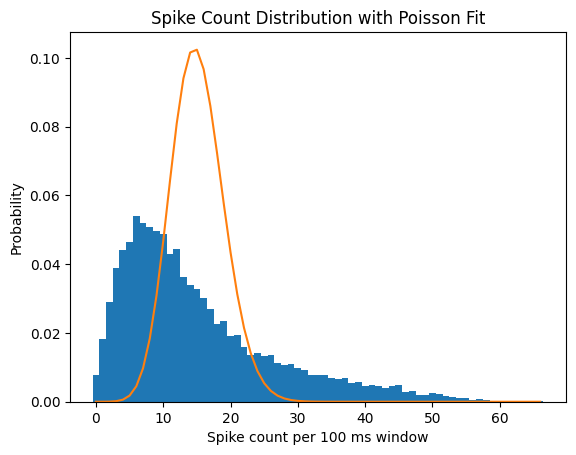

Estimated rate (Hz): 151.1866073502079


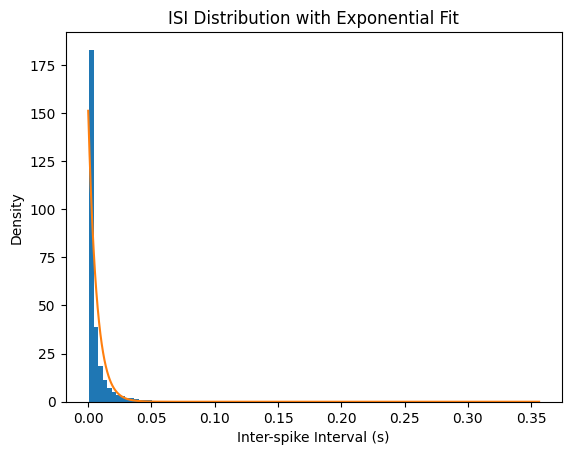

In [27]:
# Load spike times (single column text file)
file_path = 'BuszakiLab-MizusekiK-hc3/ec016/ec016.272.res.1'
spike_indices = np.loadtxt(file_path)

# Convert indices to time in seconds
sampling_rate = 20000  # 20 kHz
spike_times = spike_indices / sampling_rate

print("Total spikes:", len(spike_times))


# Define time window (e.g., 100 ms)
window_size = 0.1  # seconds

T = spike_times[-1]  # total recording time
num_windows = int(T / window_size)

# Count spikes per window
counts = []

for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    count = np.sum((spike_times >= start) & (spike_times < end))
    counts.append(count)

counts = np.array(counts)

# Estimate lambda (mean spikes per window)
lambda_hat = np.mean(counts)

print("Estimated λ (mean spikes per window):", lambda_hat)


# Histogram of spike counts
plt.figure()
bins = np.arange(0, max(counts)+2) - 0.5
plt.hist(counts, bins=bins, density=True)

# Poisson PMF
x = np.arange(0, max(counts)+1)
plt.plot(x, poisson.pmf(x, lambda_hat))

plt.xlabel("Spike count per 100 ms window")
plt.ylabel("Probability")
plt.title("Spike Count Distribution with Poisson Fit")
plt.show()


# Compute inter-spike intervals
isi = np.diff(spike_times)

# Estimate rate parameter
rate_hat = 1 / np.mean(isi)

print("Estimated rate (Hz):", rate_hat)


plt.figure()

# Histogram
plt.hist(isi, bins=100, density=True)

# Exponential PDF
x = np.linspace(0, max(isi), 1000)
plt.plot(x, expon.pdf(x, scale=1/rate_hat))

plt.xlabel("Inter-spike Interval (s)")
plt.ylabel("Density")
plt.title("ISI Distribution with Exponential Fit")
plt.show()

Total spikes: 135288
Estimated λ (mean spikes per window): 12.339688041594455


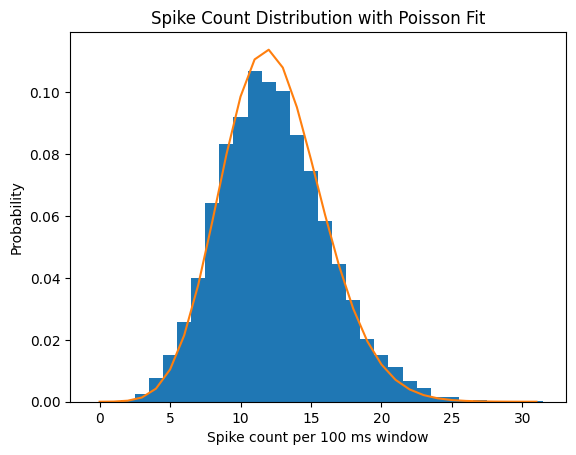

Estimated rate (Hz): 123.3931469087776


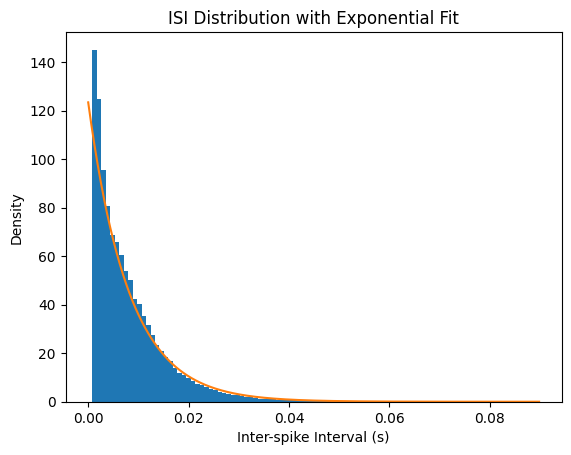

In [31]:
# Load spike times (single column text file)
file_path = 'BuszakiLab-MizusekiK-hc3/ec012/ec012ec.187.res.2'
spike_indices = np.loadtxt(file_path)

# Convert indices to time in seconds
sampling_rate = 20000  # 20 kHz
spike_times = spike_indices / sampling_rate

print("Total spikes:", len(spike_times))


# Define time window (e.g., 100 ms)
window_size = 0.1  # seconds

T = spike_times[-1]  # total recording time
num_windows = int(T / window_size)

# Count spikes per window
counts = []

for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    count = np.sum((spike_times >= start) & (spike_times < end))
    counts.append(count)

counts = np.array(counts)

# Estimate lambda (mean spikes per window)
lambda_hat = np.mean(counts)

print("Estimated λ (mean spikes per window):", lambda_hat)


# Histogram of spike counts
plt.figure()
bins = np.arange(0, max(counts)+2) - 0.5
plt.hist(counts, bins=bins, density=True)

# Poisson PMF
x = np.arange(0, max(counts)+1)
plt.plot(x, poisson.pmf(x, lambda_hat))

plt.xlabel("Spike count per 100 ms window")
plt.ylabel("Probability")
plt.title("Spike Count Distribution with Poisson Fit")
plt.show()


# Compute inter-spike intervals
isi = np.diff(spike_times)

# Estimate rate parameter
rate_hat = 1 / np.mean(isi)

print("Estimated rate (Hz):", rate_hat)


plt.figure()

# Histogram
plt.hist(isi, bins=100, density=True)

# Exponential PDF
x = np.linspace(0, max(isi), 1000)
plt.plot(x, expon.pdf(x, scale=1/rate_hat))

plt.xlabel("Inter-spike Interval (s)")
plt.ylabel("Density")
plt.title("ISI Distribution with Exponential Fit")
plt.show()

This very closely matches a poisson and exponential fit, given by the graphs above.

I think this loosely follows a poisson process, based on the shape. The skew is in the right direction, however.

#### 2.2 You need to implement maximum likelihood estimation as in the MLE example codes to fit the distributions to your data samples. Then calculate the mean of the data samples and compare it with the resulting distribution parameter and check whether they agree, i.e. to show that the MLE for fitting Poisson distribution and exponential distribution is equivalent to simply calculating the sample mean.

## MLE for Poisson Distribution

The maximum likelihood estimate for λ in a Poisson distribution is:

λ̂ = (1/n) Σ k_i

This is exactly the sample mean.

From the computation above, the MLE estimate and the sample mean agree, confirming that fitting a Poisson distribution 
is equivalent to computing the sample mean.

In [32]:
# Sample mean
sample_mean = np.mean(counts)

# Manual MLE (derived formula)
lambda_mle = np.sum(counts) / len(counts)

print("Sample Mean:", sample_mean)
print("MLE estimate:", lambda_mle)


Sample Mean: 12.339688041594455
MLE estimate: 12.339688041594455


## MLE for Exponential Distribution

The maximum likelihood estimate for the exponential rate parameter is:

λ̂ = 1 / mean(ISI)

Thus, fitting an exponential distribution is equivalent to computing 
the inverse of the sample mean.

The numerical results confirm this equivalence.


In [34]:
isi_mean = np.mean(isi)
lambda_exp_mle = 1 / isi_mean

print("Mean ISI:", isi_mean)
print("Exponential MLE (rate):", lambda_exp_mle)


Mean ISI: 0.008104177785005212
Exponential MLE (rate): 123.3931469087776


#### 2.3 When you fit Poisson distribution to the number of spikes, different selection of time interval length may result in different distribution. Some cases may fit well to Poisson, some may not. You can use Fano factor (variance/mean) to evaluate whether its close to Poisson distribution. Poisson distribution has a Fano factor that equals 1. Do summarize what you found when you try different time intervals. Also, when you fit exponential distribution to inter-spike intervals and find it does not fit well, try to explain why.

In [33]:
window_sizes = [0.01, 0.05, 0.1, 0.2, 0.5]  # seconds

for window_size in window_sizes:
    
    T = spike_times[-1]
    num_windows = int(T / window_size)
    
    counts = []
    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        count = np.sum((spike_times >= start) & (spike_times < end))
        counts.append(count)
    
    counts = np.array(counts)
    
    mean = np.mean(counts)
    var = np.var(counts)
    fano = var / mean
    
    print(f"Window: {window_size}s | Mean: {mean:.3f} | Var: {var:.3f} | Fano: {fano:.3f}")


Window: 0.01s | Mean: 1.233 | Var: 1.013 | Fano: 0.821
Window: 0.05s | Mean: 6.169 | Var: 5.802 | Fano: 0.940
Window: 0.1s | Mean: 12.340 | Var: 14.705 | Fano: 1.192
Window: 0.2s | Mean: 24.679 | Var: 42.209 | Fano: 1.710
Window: 0.5s | Mean: 61.698 | Var: 185.142 | Fano: 3.001


## Final Interpretation

The spike count statistics depend strongly on the chosen time window.

For very small windows (0.01 s), the Fano factor is less than 1,
indicating underdispersion due to the refractory period of the neuron.
This violates the independence assumption of a Poisson process.

For intermediate windows (0.05–0.1 s), the Fano factor approaches 1,
suggesting approximately Poisson-like behavior.

For larger windows (0.2–0.5 s), the Fano factor becomes significantly
greater than 1, indicating overdispersion. This suggests slow rate
fluctuations or burst firing behavior, which are inconsistent with
a stationary Poisson process.

Therefore, while the neuron exhibits approximately Poisson behavior
at certain time scales, it is not a perfect Poisson process.
Biological mechanisms such as refractory effects and rate modulation
introduce deviations from ideal Poisson statistics.
